<h1 style="color: #00BFFF;">00 |</h1>

In [2]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import os # file managment
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization
import warnings # warning messages management
import datetime # to play with dates

# 🤖 Machine Learning
from sklearn.linear_model import LinearRegression # linear regression model
from scipy.stats import skew # data distribution assymmetry

In [3]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [4]:
# 🎯 Specific functions
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

def outlier_slayer(data): # automatically removes outliers based on Q1, Q3
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

<h2 style="color: #008080;">Data Extraction</h2>

In [5]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/03. Projects/05_patern_pending/00_data", "cleaned.csv")
cleaned = pd.read_csv(file_path, index_col=0) # to deal with an error `Unnamed: 0` column

<h1 style="color: #00BFFF;">03 | Exploratory Data Analysis (EDA)</h1>

<h2 style="color: #008080;">Checking Duplicates and entry errors</h2>

In [6]:
explore_data(cleaned)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
bedrooms,0,0
bathrooms,0,0
sqft_living,0,0
sqft_lot,0,0
floors,0,0
waterfront,0,0
view,0,0
condition,0,0
grade,0,0
sqft_above,0,0


In [7]:
# So, nothing to do here, moving on!

<h2 style="color: #008080;">Checking Data distributions</h2>

In [8]:
cleaned.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'year', 'month_Apr',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'house_lifetime', 'price'],
      dtype='object')

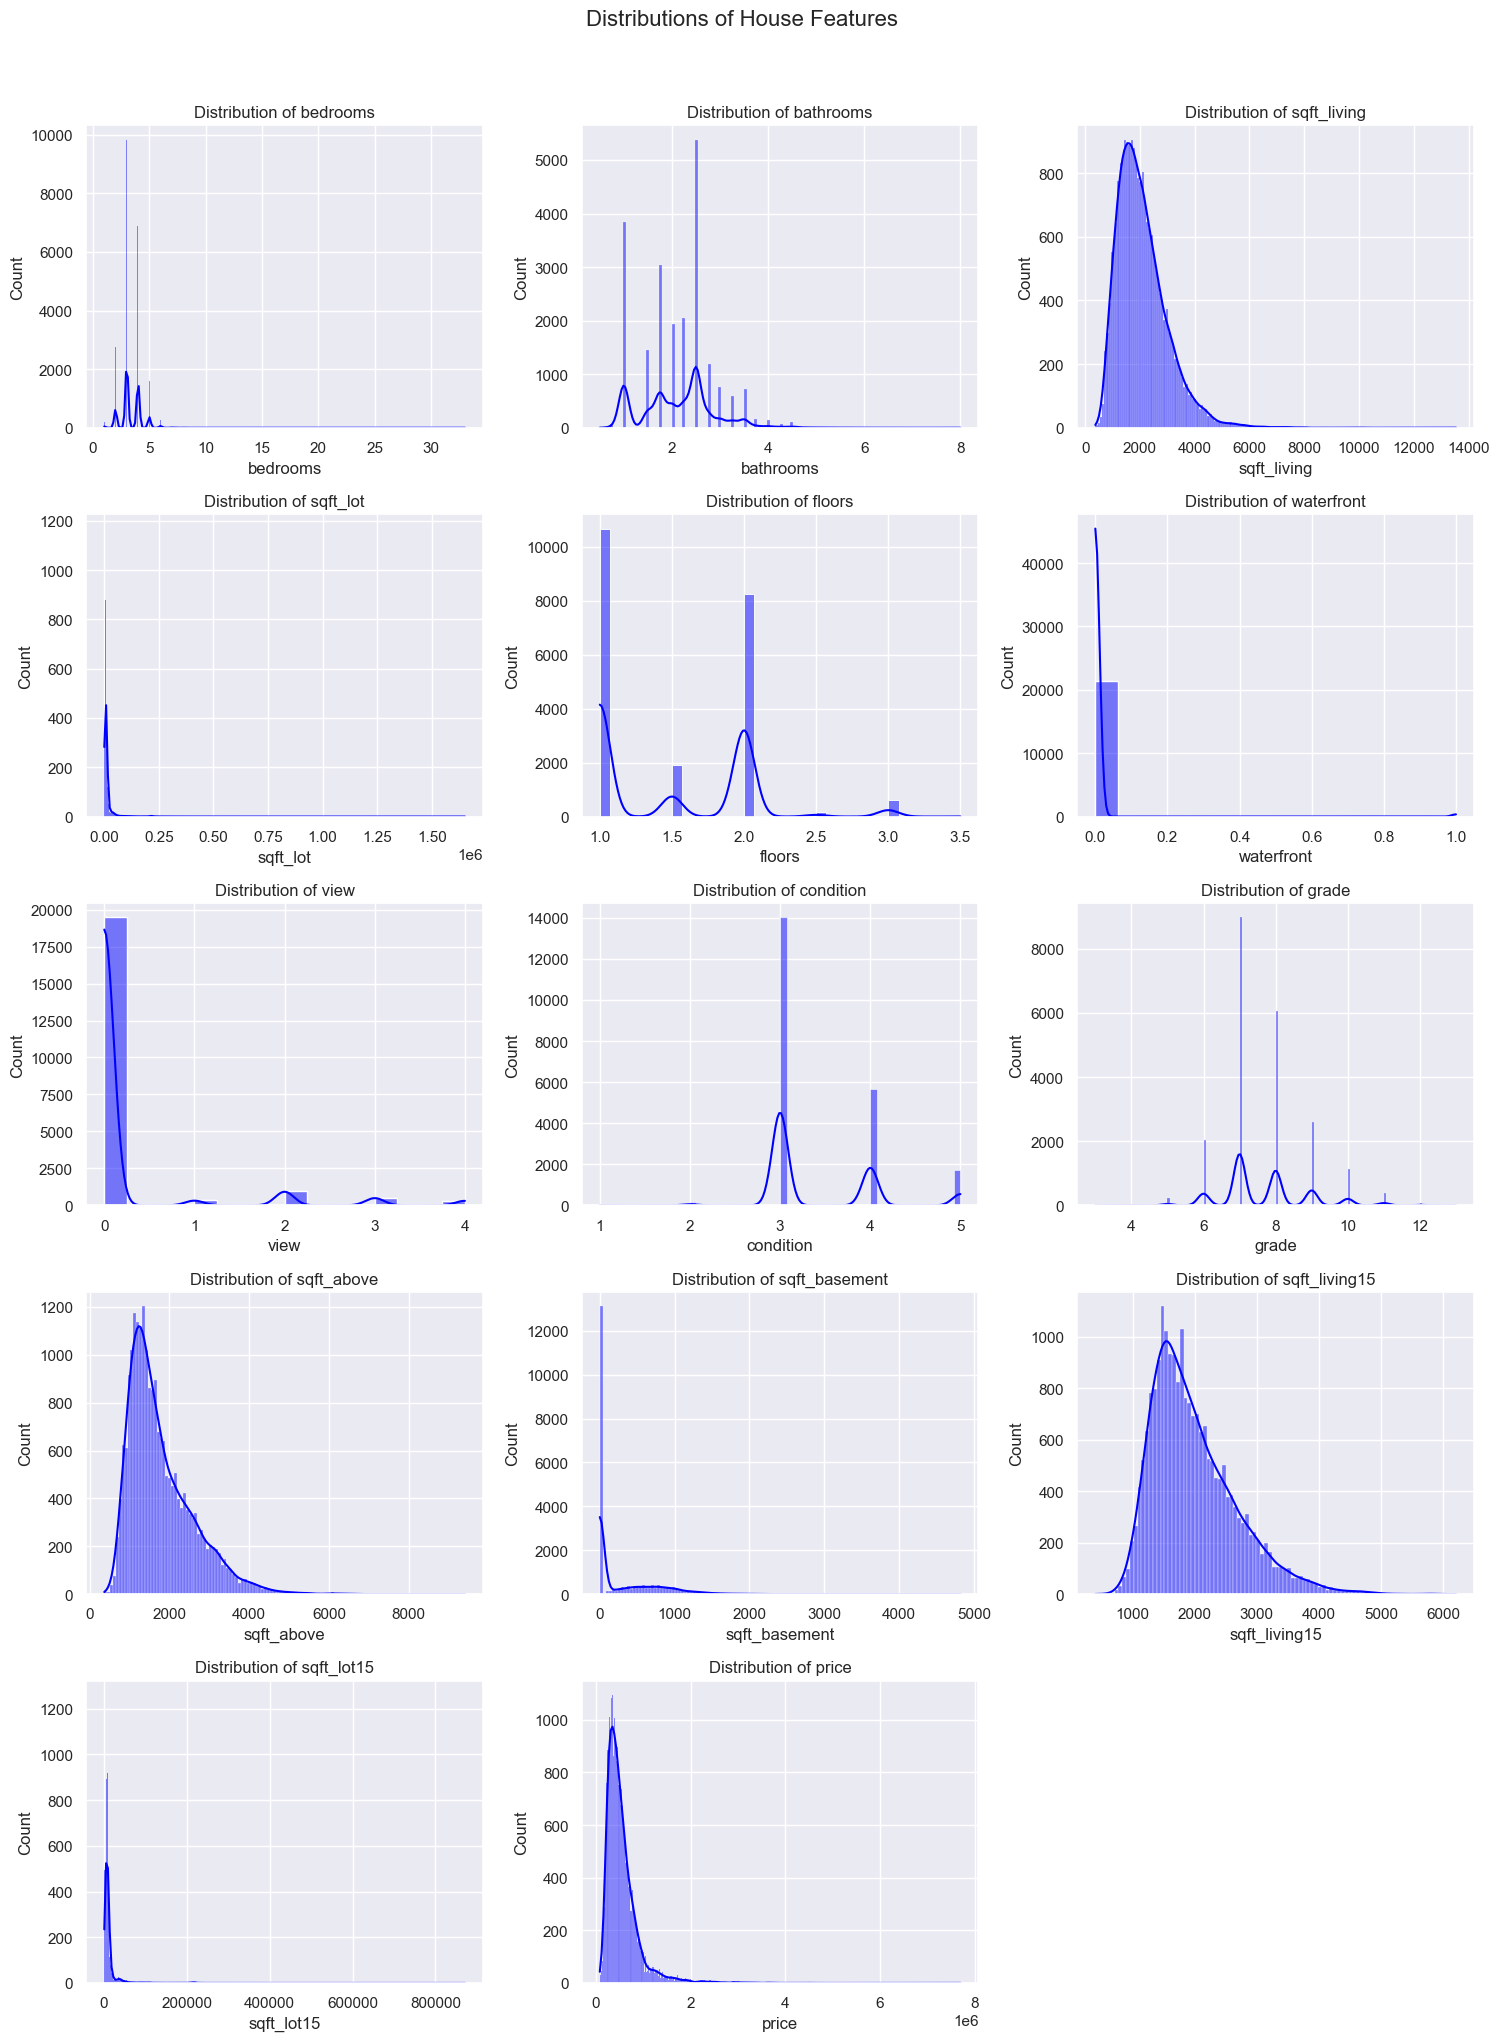

In [9]:
# We will check Data distribtuions for all features, except for month encoded
house_features = cleaned[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']]

# Dark background
sns.set(style="darkgrid")

# Number of rows and columns for the grid
n_features = len(house_features.columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# Grid of histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate(house_features.columns):
    sns.histplot(data=house_features, x=column, kde=True, color="blue", ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")

# Removing empty subplots
for i in range(len(house_features.columns), n_rows * n_cols):
    fig.delaxes(axes[i])

fig.suptitle("Distributions of House Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

<blockquote style="background-color: #d4edda; color: #155724; border-color: #c3e6cb; padding: 10px; border-radius: 5px;">

* In a Linear Regression, the model assumes that the errors (residuals) are normally distributed; not the features themselves.
* So, firstly, we will run the model, to later decide what we can do to **fine-tune** our data.
* For example; `sqft_living`, `sqft_above`, `sqft_living15`, `sqft_lot15` and `price` show a positively skewed distribution
* And `condition` and `grade` look like a categorical.
</blockquote>

In [10]:
cleaned['condition'].value_counts()

3    14018
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [11]:
cleaned['grade'].value_counts()

7     8974
8     6065
9     2613
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

<h2 style="color: #008080;">Dealing with Skewness</h2>

In [12]:
# Calculate skewness only for numeric columns
skew_values = house_features.apply(skew)
print(skew_values)

bedrooms          2.023631
bathrooms         0.519654
sqft_living       1.473049
sqft_lot         13.071215
floors            0.614269
waterfront       11.379467
view              3.395805
condition         1.035823
grade             0.788468
sqft_above        1.447316
sqft_basement     1.576696
sqft_living15     1.106766
sqft_lot15        9.523388
price             4.022972
dtype: float64


<blockquote style="background-color: #d4edda; color: #155724; border-color: #c3e6cb; padding: 10px; border-radius: 5px;">
* We can deal with some skewed data after first running a model.
</blockquote>

<h2 style="color: #008080;">Checking Outliers</h2>

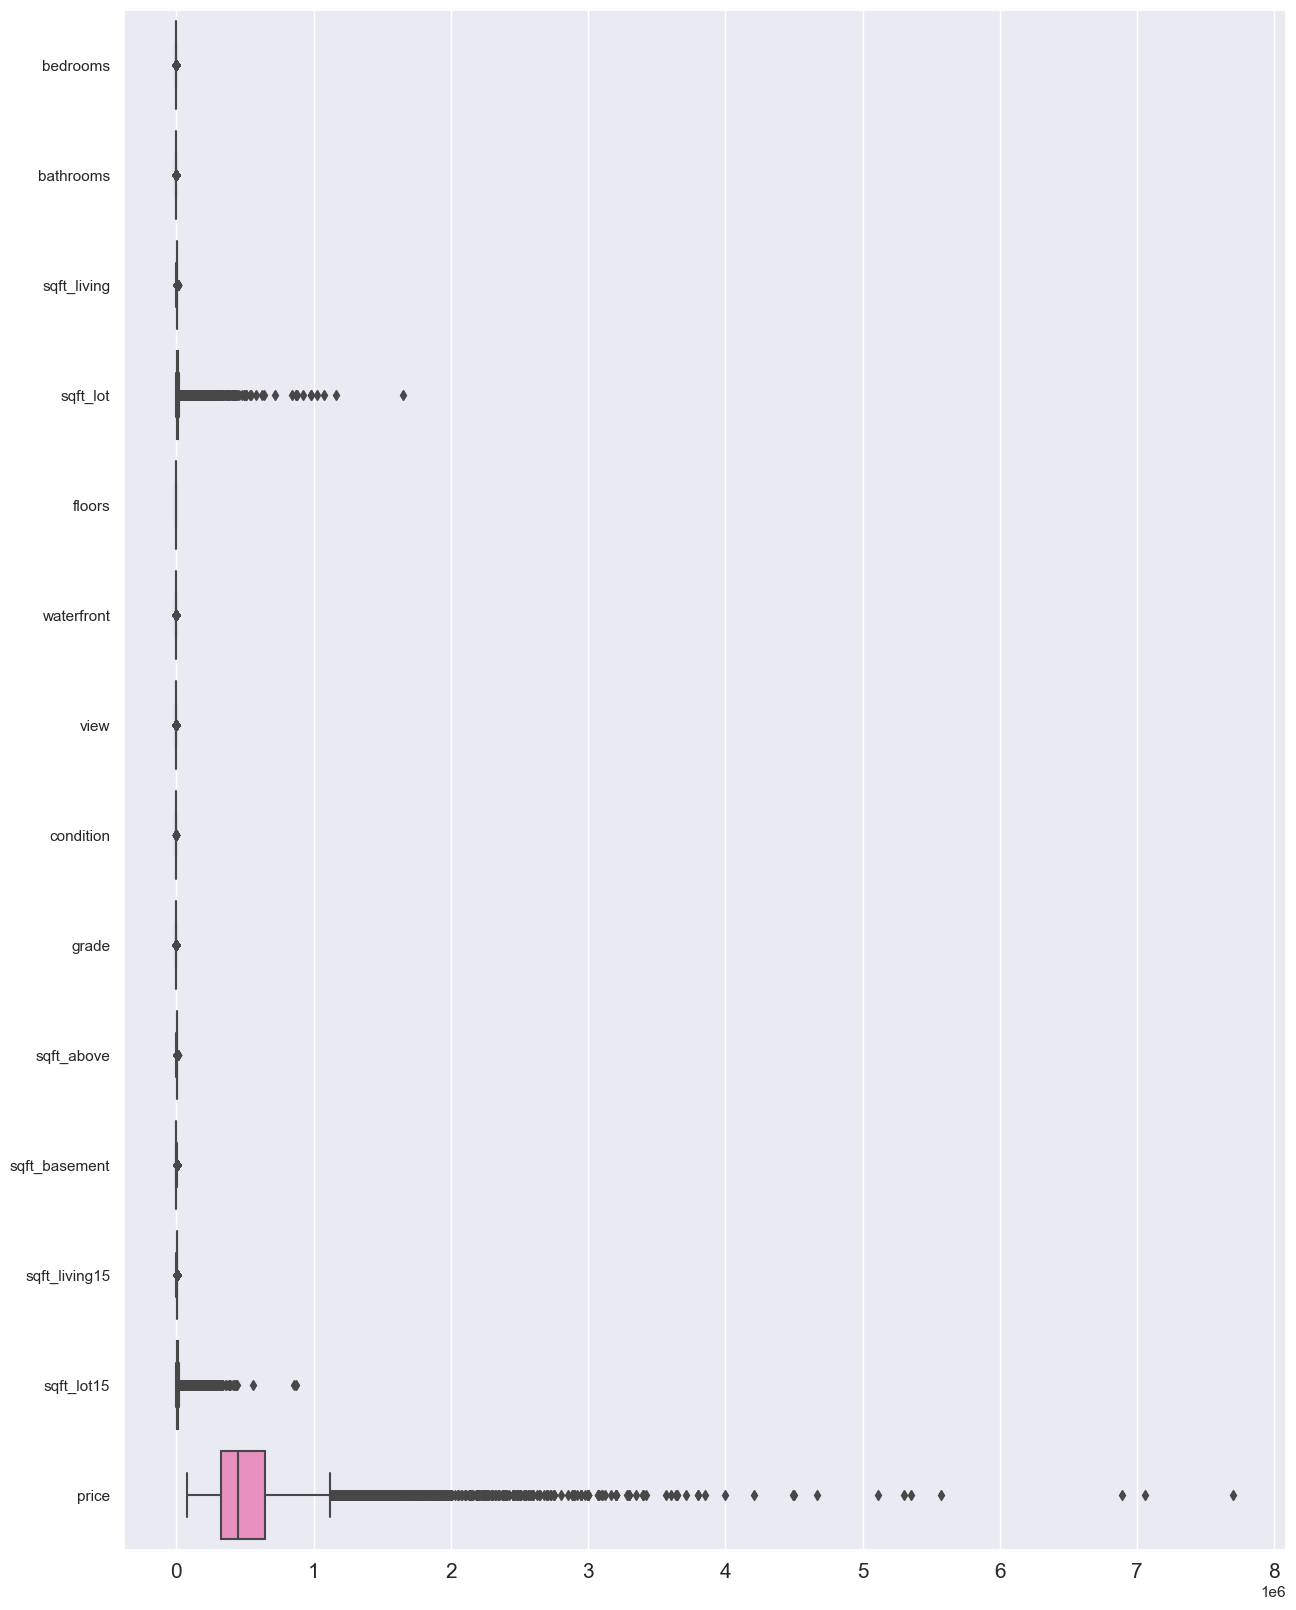

In [13]:
# For house_features variable used while checking Data distributions
fig, ax = plt.subplots(figsize=(15, 20))
sns.boxplot(data=house_features, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

In [16]:
house_features = outlier_slayer(house_features)

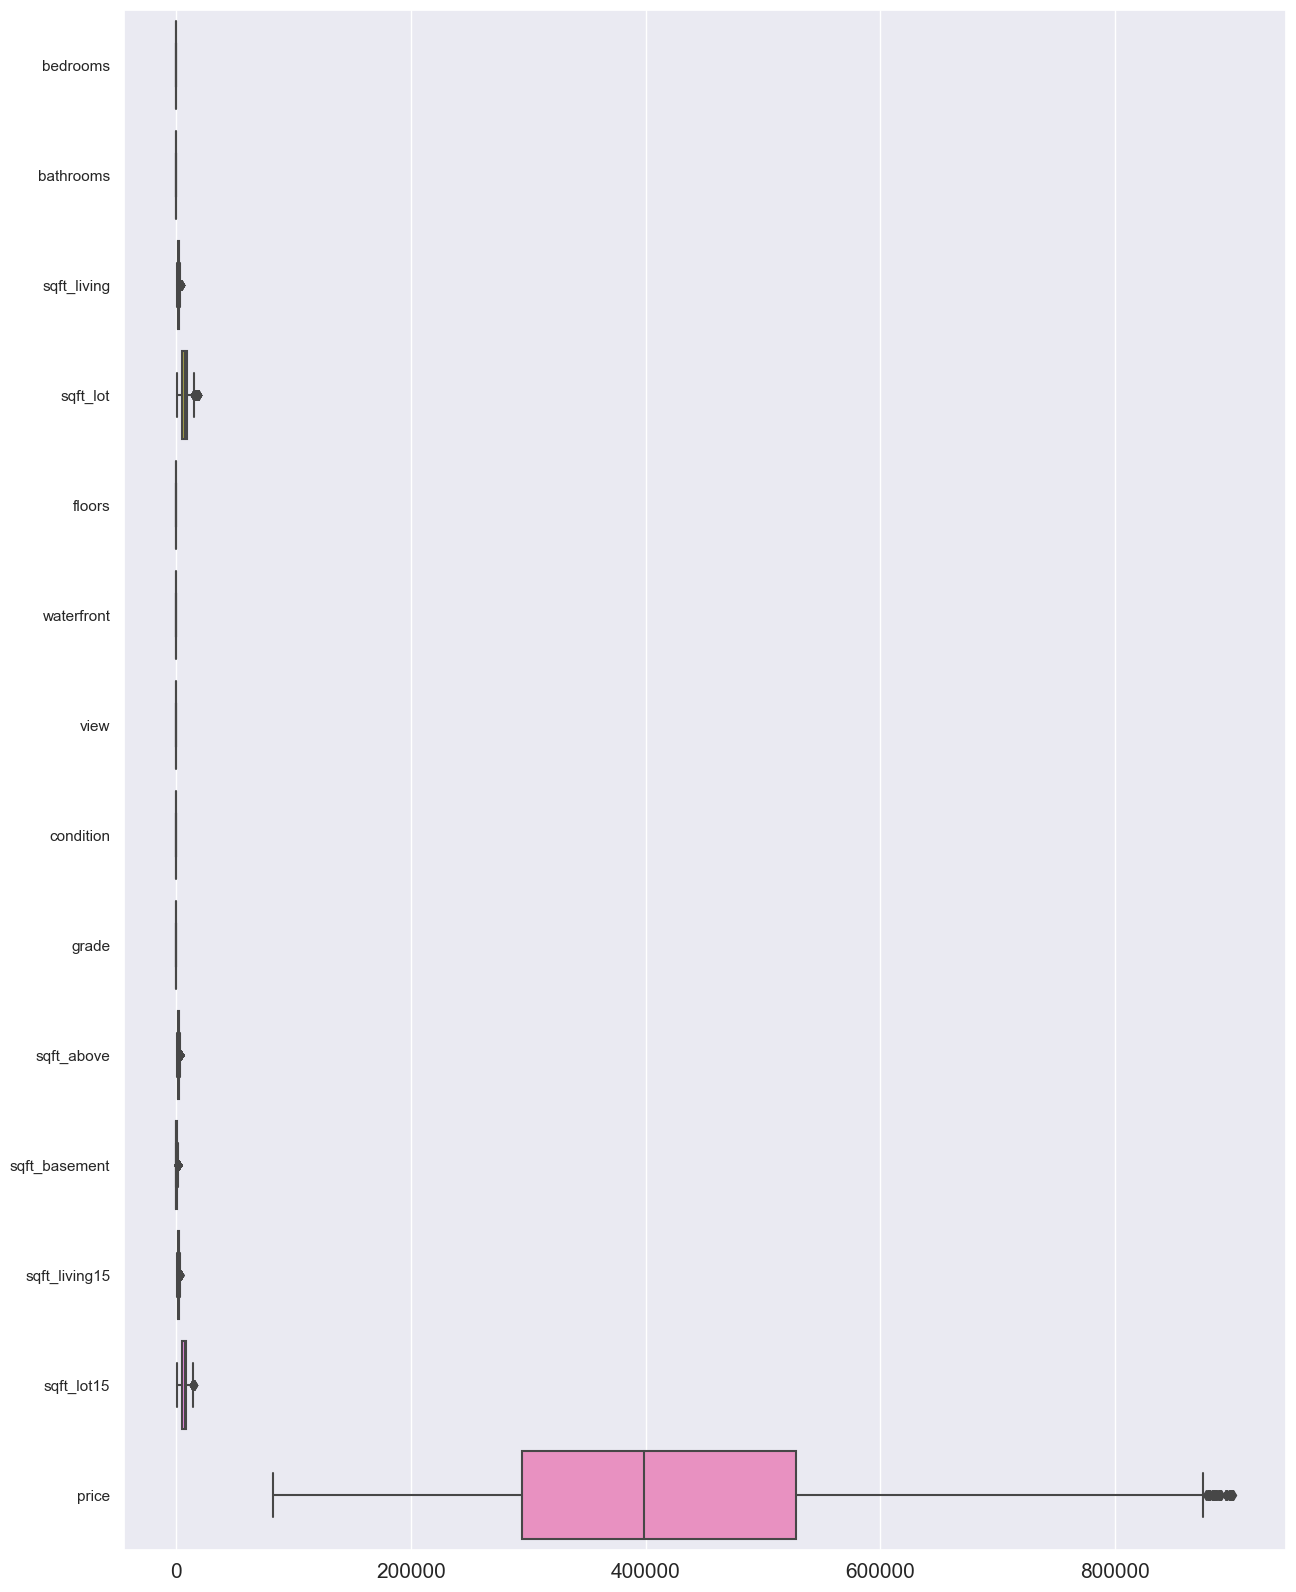

In [17]:
# For house_features variable used while checking Data distributions
fig, ax = plt.subplots(figsize=(15, 20))
sns.boxplot(data=house_features, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

In [18]:
# Now we are able to predict higher property value - $650K.

In [23]:
cleaned.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'year', 'month_Apr',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'house_lifetime', 'price'],
      dtype='object')

<h2 style="color: #008080;">Checking Multicollinearity</h2>

In [19]:
# Creating the matrix
house_matrix = round(house_features.corr(), 4)

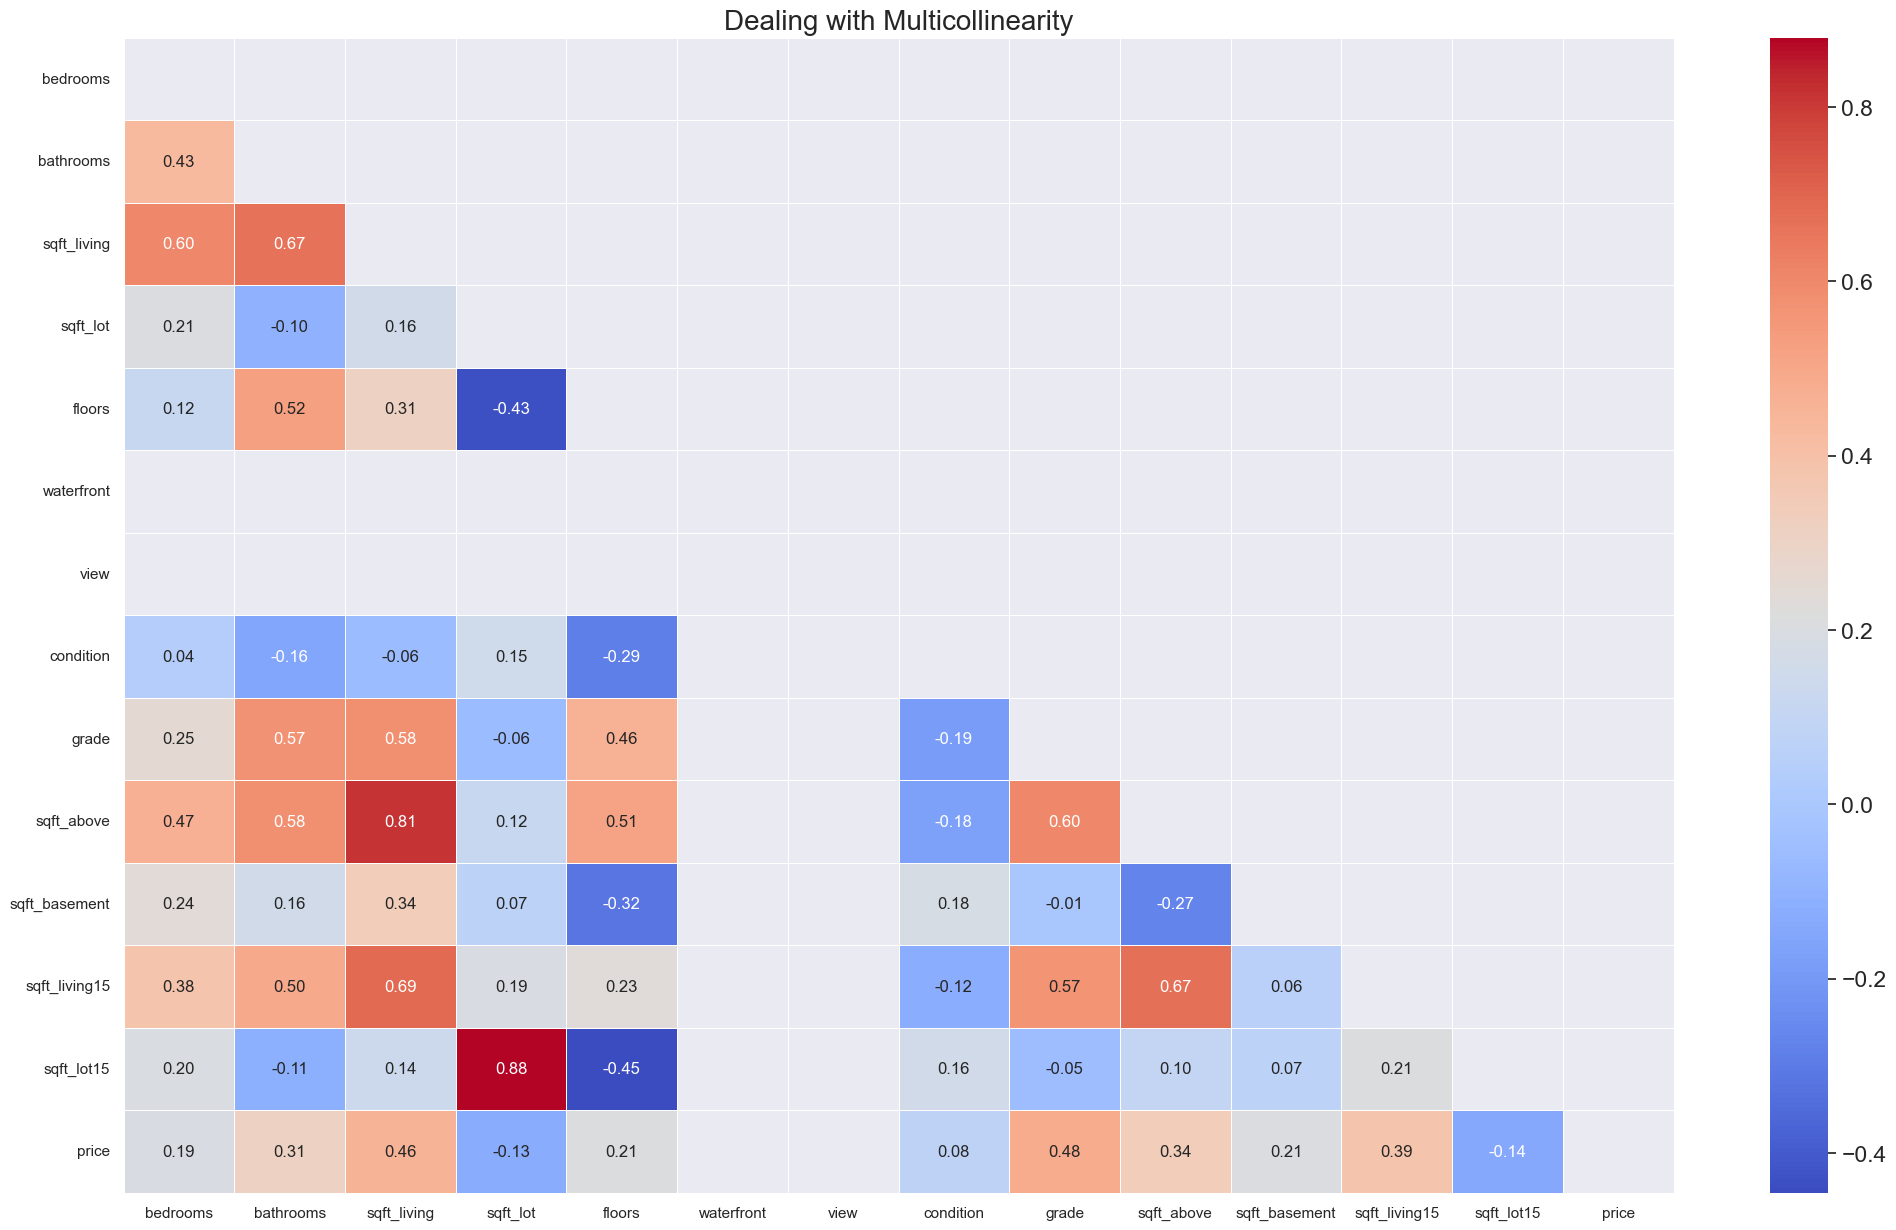

In [20]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(house_matrix)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(house_matrix, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [21]:
# Nothing to do here for the moment

<h2 style="color: #008080;">Updating cleaned</h2>

In [24]:
# Update the cleaned dataset with house_features
cleaned.update(house_features)

<h2 style="color: #008080;">Moving on to --> 04_data_processing</h2>

In [22]:
df = cleaned.copy()
df.to_csv("C:/Users/apisi/01. IronData/01. GitHub/03. Projects/05_patern_pending/00_data/df.csv")

<h2 style="color: #008080;">(Or... keep reading to get insights of our Data)</h2>

<h1 style="color: #00BFFF;">03 | Explanatory Data Analysis (EDA)</h1>

<h2 style="color: #008080;">Most important features</h2>

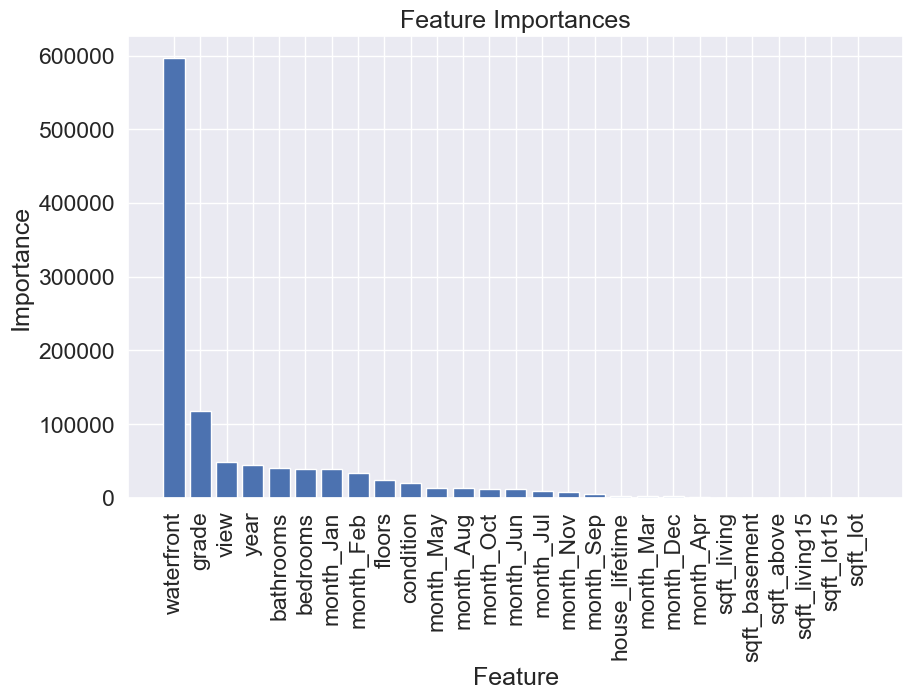

In [25]:
# Split the data into input and target variables
X = cleaned.drop("price", axis=1)
y = cleaned["price"]

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)

# Calculate the feature importances
importances = np.abs(model.coef_)
feature_names = X.columns

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

<h2 style="color: #008080;">What can we do with zipcodes?</h2>

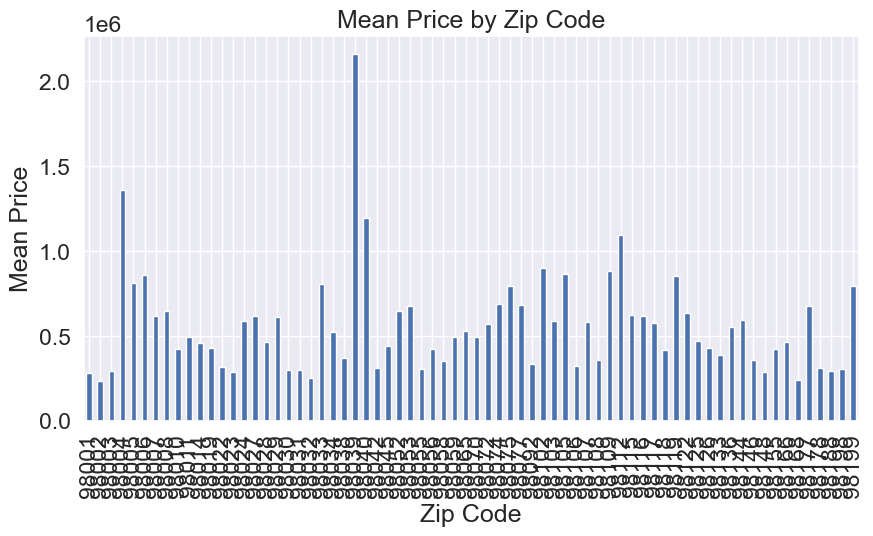

In [20]:
# Group the data by zip code and calculate the mean price for each group
mean_price_by_zip = datac.groupby('zipcode')['price'].mean()

# Plot the mean price by zip code
mean_price_by_zip.plot(kind='bar', figsize=(10, 5))
plt.title('Mean Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Mean Price')
plt.show()

<h2 style="color: #008080;">Calculating the mean price by location</h2>

Using lat, long and price

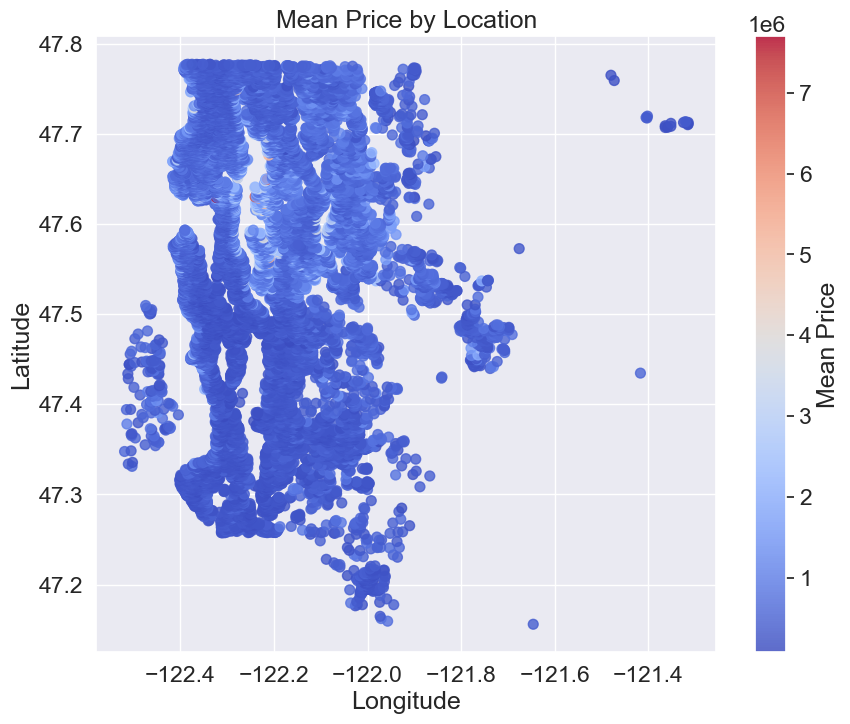

In [21]:
# Group the data by latitude and longitude and calculate the mean price for each group
mean_price_by_location = datac.groupby(['lat', 'long'])['price'].mean().reset_index()

# Set up the scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(mean_price_by_location['long'], mean_price_by_location['lat'], s=50, c=mean_price_by_location['price'], cmap='coolwarm', alpha=0.8)

# Add a color bar
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Mean Price')

# Set the axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Price by Location')

# Show the plot
plt.show()

<h2 style="color: #008080;">And now, moving on to --> 04_data_processing</h2>